In [ ]:
%pip install oasis-deconv

https://github.com/j-friedrich/OASIS

In [2]:
from oasis.functions import gen_data, gen_sinusoidal_data, deconvolve
import matplotlib.pyplot as plt

In [3]:
# Let's see what gen_data does
gen_data?

Signature:
gen_data(
    g=[0.95],
    sn=0.3,
    T=3000,
    framerate=30,
    firerate=0.5,
    b=0,
    N=20,
    seed=13,
)
Docstring:
Generate data from homogenous Poisson Process

Parameters
----------
g : array, shape (p,), optional, default=[.95]
    Parameter(s) of the AR(p) process that models the fluorescence impulse response.
sn : float, optional, default .3
    Noise standard deviation.
T : int, optional, default 3000
    Duration.
framerate : int, optional, default 30
    Frame rate.
firerate : int, optional, default .5
    Neural firing rate.
b : int, optional, default 0
    Baseline.
N : int, optional, default 20
    Number of generated traces.
seed : int, optional, default 13
    Seed of random number generator.

Returns
-------
y : array, shape (T,)
    Noisy fluorescence data.
c : array, shape (T,)
    Calcium traces (without sn).
s : array, shape (T,)
    Spike trains.
File:      c:\users\sangeetha\anaconda3\envs\caiman\lib\site-packages\oasis\functions.py
Type:   

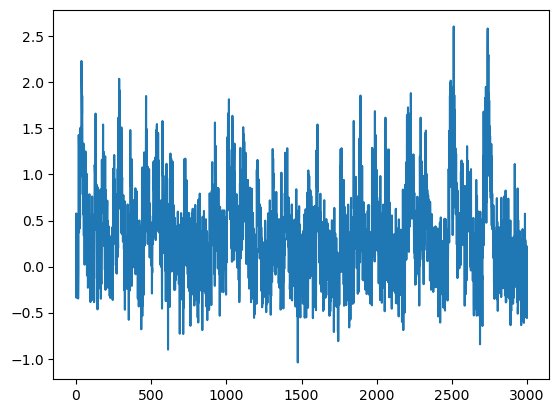

In [4]:
# How does N=1 look like?
y, _, _ = gen_data(N=1)
plt.plot(y[0]);

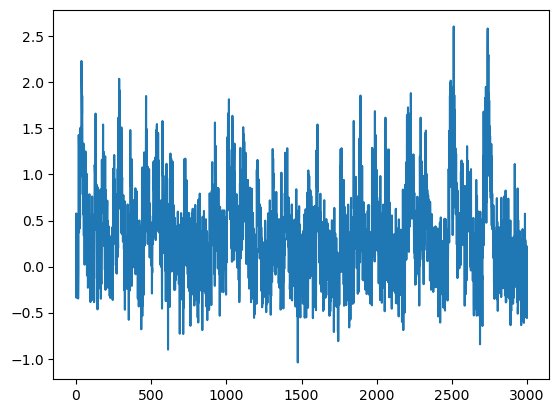

In [5]:
# How does N=2 look like?
y, _, _ = gen_data(N=1)
plt.plot(y[0])

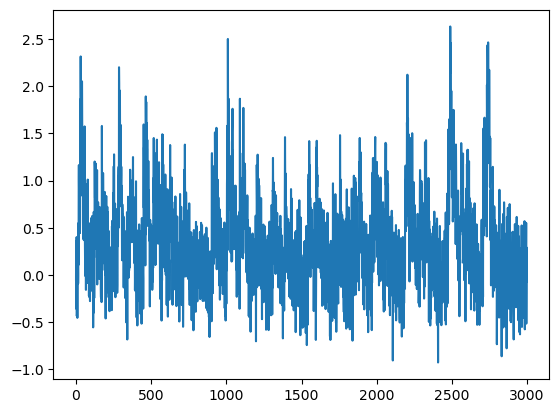

In [6]:
# How does N=20000 look like?
y, _, _ = gen_data(N=20000)
plt.plot(y[0])

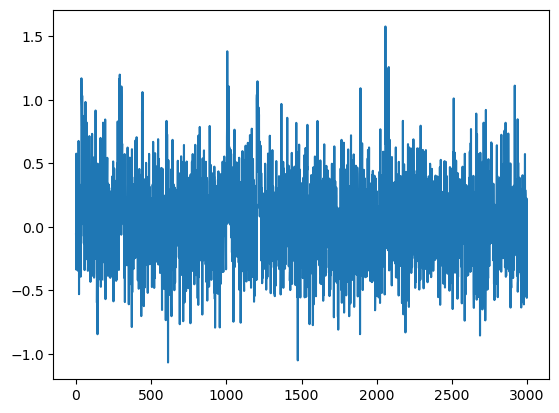

In [7]:
# playing around with firerate 
y, _, _ = gen_data(firerate=0.1, N=1)
plt.plot(y[0])

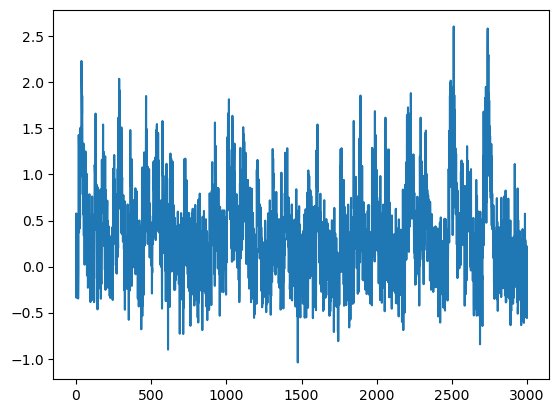

In [8]:
# playing around with firerate 
y, _, _ = gen_data(firerate=0.5, N=1)
plt.plot(y[0])

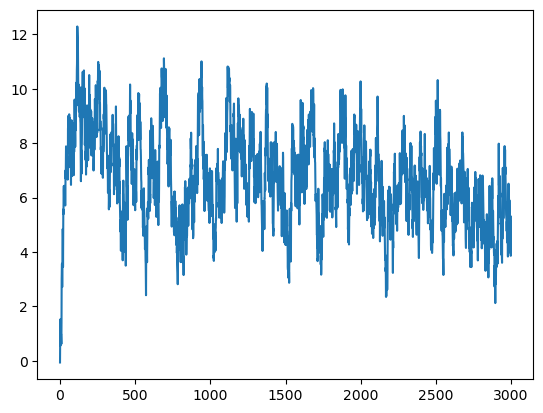

In [9]:
# playing around with firerate 
y, _, _ = gen_data(firerate=10, N=1)
plt.plot(y[0])

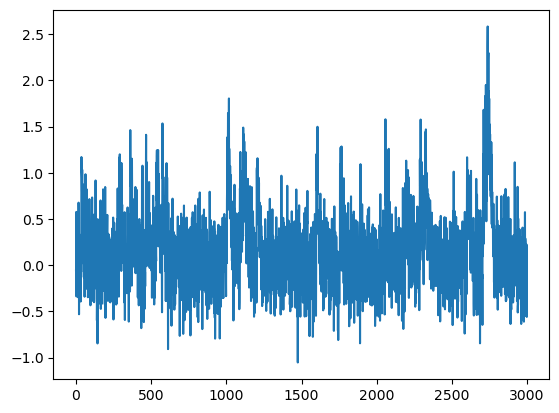

In [15]:
# playing around with firerate 
y, _, _ = gen_data(firerate=0.25, N=1)
plt.plot(y[0])

In [16]:
# Let's see what gen_sinusoidal_data does

gen_sinusoidal_data?

Signature:
gen_sinusoidal_data(
    g=[0.95],
    sn=0.3,
    T=3000,
    framerate=30,
    firerate=0.5,
    b=0,
    N=20,
    seed=13,
)
Docstring:
Generate data from inhomogenous Poisson Process with sinusoidal instantaneous activity

Parameters
----------
g : array, shape (p,), optional, default=[.95]
    Parameter(s) of the AR(p) process that models the fluorescence impulse response.
sn : float, optional, default .3
    Noise standard deviation.
T : int, optional, default 3000
    Duration.
framerate : int, optional, default 30
    Frame rate.
firerate : float, optional, default .5
    Neural firing rate.
b : float, optional, default 0
    Baseline.
N : int, optional, default 20
    Number of generated traces.
seed : int, optional, default 13
    Seed of random number generator.

Returns
-------
y : array, shape (T,)
    Noisy fluorescence data.
c : array, shape (T,)
    Calcium traces (without sn).
s : array, shape (T,)
    Spike trains.
File:      c:\users\sangeetha\anaconda3\e

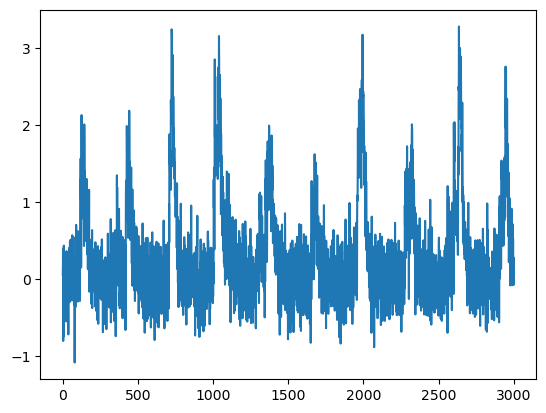

In [17]:
# all default 
y, _, _ = gen_sinusoidal_data()
plt.plot(y[0])

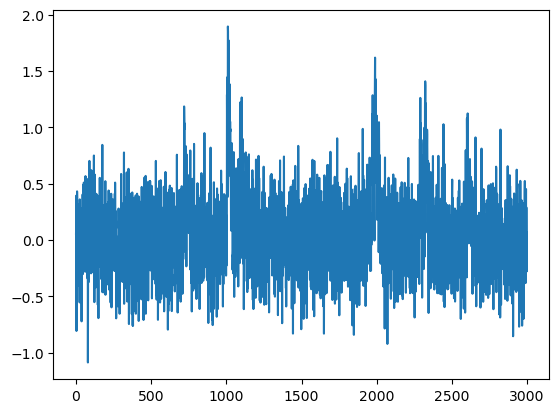

In [18]:
# playing around with firing rate
y, _, _ = gen_sinusoidal_data(firerate=0.1)
plt.plot(y[0])

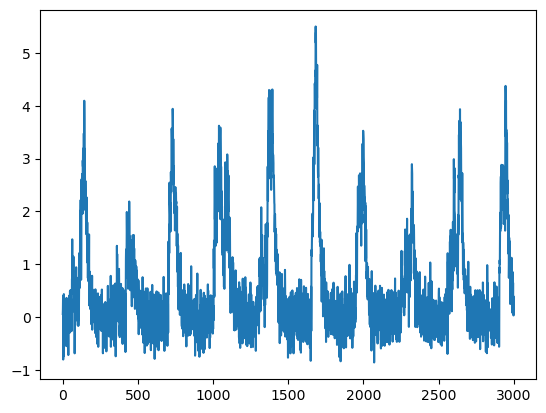

In [19]:
# playing around with firing rate
y, _, _ = gen_sinusoidal_data(firerate=1.0)
plt.plot(y[0])

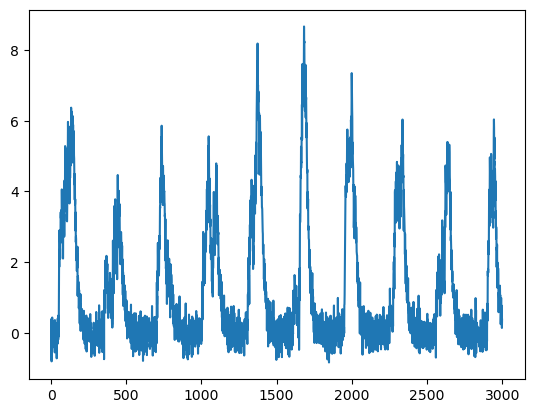

In [20]:
# playing around with firing rate
y, _, _ = gen_sinusoidal_data(firerate=2.0)
plt.plot(y[0])

In [37]:
# Let's look into deconvolve
deconvolve?

Signature:
deconvolve(
    y,
    g=(None,),
    sn=None,
    b=None,
    b_nonneg=True,
    optimize_g=0,
    penalty=0,
    **kwargs,
)
Docstring:
Infer the most likely discretized spike train underlying an fluorescence trace

Solves the noise constrained sparse non-negative deconvolution problem
min |s|_q subject to |c-y|^2 = sn^2 T and s = Gc >= 0
where q is either 1 or 0, rendering the problem convex or non-convex.

Parameters:
-----------
y : array, shape (T,)
    Fluorescence trace.
g : tuple of float, optional, default (None,)
    Parameters of the autoregressive model, cardinality equivalent to p.
    Estimated from the autocovariance of the data if no value is given.
sn : float, optional, default None
    Standard deviation of the noise distribution.  If no value is given,
    then sn is estimated from the data based on power spectral density if not provided.
b : float, optional, default None
    Fluorescence baseline value. If no value is given, then b is optimized.
b_nonneg

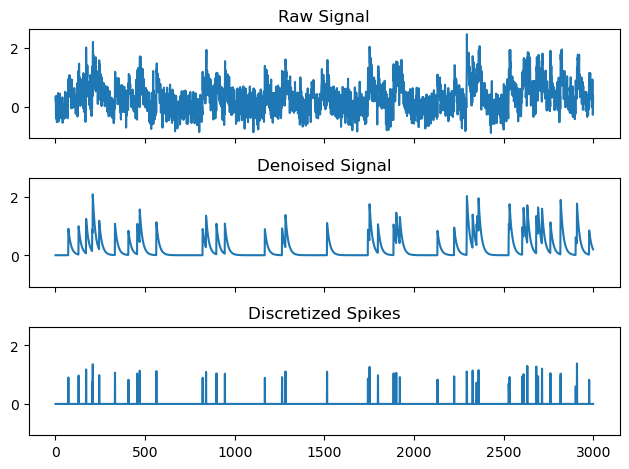

In [46]:
# lets try deconvolving signal from gen_data
y, _, _ = gen_data(N=1, seed=42)
denoise_sig, spikes_sig, baseline_sig, _, _ = deconvolve(y[0])

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)

axs[0].plot(y[0])
axs[0].set_title('Raw Signal')

axs[1].plot(denoise_sig)
axs[1].set_title('Denoised Signal')

axs[2].plot(spikes_sig)
axs[2].set_title("Discretized Spikes")

plt.tight_layout()

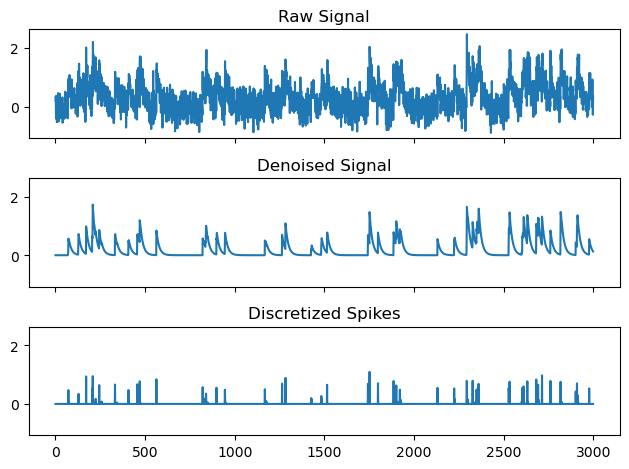

In [48]:
# lets try deconvolving signal from gen_data and penalty=1  
y, _, _ = gen_data(N=1, seed=42)
denoise_sig, spikes_sig, baseline_sig, _, _ = deconvolve(y[0], penalty=1)

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)

axs[0].plot(y[0])
axs[0].set_title('Raw Signal')

axs[1].plot(denoise_sig)
axs[1].set_title('Denoised Signal')

axs[2].plot(spikes_sig)
axs[2].set_title("Discretized Spikes")

plt.tight_layout()

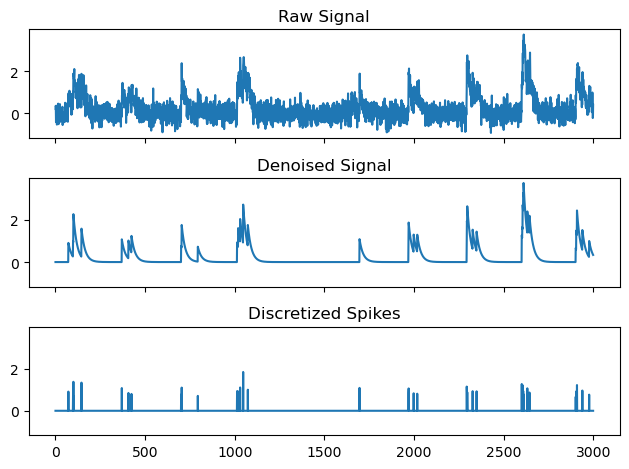

In [47]:
# lets try deconvolving signal from gen_sinusoidal_data
y, _, _ = gen_sinusoidal_data(N=1, seed=42)
denoise_sig, spikes_sig, baseline_sig, _, _ = deconvolve(y[0])

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)

axs[0].plot(y[0])
axs[0].set_title('Raw Signal')

axs[1].plot(denoise_sig)
axs[1].set_title('Denoised Signal')

axs[2].plot(spikes_sig)
axs[2].set_title("Discretized Spikes")

plt.tight_layout()

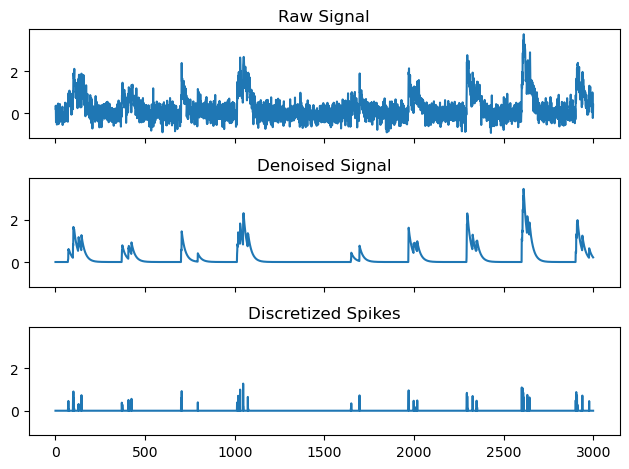

In [51]:
# lets try deconvolving signal from gen_sinusoidal_data and penalty=1
y, _, _ = gen_sinusoidal_data(N=1, seed=42)
denoise_sig, spikes_sig, baseline_sig, _, _ = deconvolve(y[0], penalty=1)

fig, axs = plt.subplots(3, 1, sharex=True, sharey=True)

axs[0].plot(y[0])
axs[0].set_title('Raw Signal')

axs[1].plot(denoise_sig)
axs[1].set_title('Denoised Signal')

axs[2].plot(spikes_sig)
axs[2].set_title("Discretized Spikes")

plt.tight_layout()